In [2]:
install.packages("gridExtra")
install.packages("lubridate")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
#bibliotecas a serem utilizadas 
#visualização de RMSE no jupyter
library(ggplot2)
library(tidyverse)
#library to plot two or more plots in a grid
library(gridExtra)
library(repr)
library(lubridate)

Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [ ]:
locfRandom1=as.data.frame(read.table("../expRandomFinal/resultados/df_locf.txt"))
malLinRandom1=as.data.frame(read.table("../expRandomFinal/resultados/df_movingAverage_linear.txt"))
malSimRandom1=as.data.frame(read.table("../expRandomFinal/resultados/df_movingAverage_simple.txt"))
splRandom1=as.data.frame(read.table("../expRandomFinal/resultados/df_spline_interpolation.txt"))
stiRandom1=as.data.frame(read.table("../expRandomFinal/resultados/df_stine_interpolation.txt"))
#seadecRandom1=as.data.frame(read.table("../expRandomFinal/resultados/df_seadec.txt"))
seasplitRandom1=as.data.frame(read.table("../expRandomFinal/resultados/df_seasplit.txt"))
#ssaRandom1=as.data.frame(read.table("../expRandomFinal/resultados/df_ssa.txt"))

todosRandom1=rbind(locfRandom, splRandom, stiRandom, malSimRandom, malLinRandom,seasplitRandom)

todosRandom1$tamanho=rep(seq(1,100,1), each=30)



In [57]:



locfRandom=as.data.frame(read.table("../expRandomFinal/resultados/df_locf.txt"))
malLinRandom=as.data.frame(read.table("../expRandomFinal/resultados/df_movingAverage_linear.txt"))
malSimRandom=as.data.frame(read.table("../expRandomFinal/resultados/df_movingAverage_simple.txt"))
splRandom=as.data.frame(read.table("../expRandomFinal/resultados/df_spline_interpolation.txt"))
stiRandom=as.data.frame(read.table("../expRandomFinal/resultados/df_stine_interpolation.txt"))
#seadecRandom=as.data.frame(read.table("../expRandomFinal/resultados/df_seadec.txt"))
seasplitRandom=as.data.frame(read.table("../expRandomFinal/resultados/df_seasplit.txt"))
ssaRandom=as.data.frame(read.table("../expRandomFinal/resultados/df_ssa.txt"))

nrow(locfRandom)
nrow(splRandom)
nrow(stiRandom)
nrow(seasplitRandom)
nrow(ssaRandom)
nrow(malSimRandom)
nrow(malLinRandom)

todosRandom=rbind(locfRandom, splRandom, stiRandom, malSimRandom, malLinRandom,seasplitRandom, ssaRandom)
#todosRandom=rbind(locfRandom, meanRandom, medianRandom, malSimRandom, malExpRandom, malLinRandom, splRandom, stiRandom, seadecRandom)

todosRandom$tamanho=rep(seq(10,8660,50), each=30)

names(todosRandom)=c("algoritmo" , "rmse", "mse", "mae", "mape", "tamanho")



todosMedia=todosRandom %>%
    group_by(algoritmo, tamanho) %>%
    summarize(rmse = mean(rmse, na.rm = TRUE))

sdTodosMedia = todosRandom %>% 
    group_by(algoritmo, tamanho) %>%
    summarize(sdRmse=sd(rmse, na.rm=TRUE))

todosMedia$sdRmse = sdTodosMedia$sdRmse

n=30 #tamanho da amostra. Ou seja, tem 30 lacunas de tamanho 100, 30 de tamanho 200...
error=qnorm(0.975)*todosMedia$sdRmse/sqrt(n)
todosMedia$error=error
# The errorbars overlapped, so use position_dodge to move them horizontally
pd <- position_dodge(0.0) # move them .05 to the left and right

head(todosMedia)

[1] 5220

[1] 5220

[1] 5220

[1] 5220

[1] 5220

[1] 5220

[1] 5220

algoritmo,tamanho,rmse,sdRmse,error
locf,10,0.003443055,0.0018415977,6.589952e-04
locf,60,0.003140351,0.0005420852,1.939791e-04
locf,110,0.002988969,0.0002493446,8.922518e-05
locf,160,0.003111332,0.0002754455,9.856510e-05
locf,210,0.003042085,0.0002653870,9.496578e-05
locf,260,0.003032776,0.0002803041,1.003037e-04


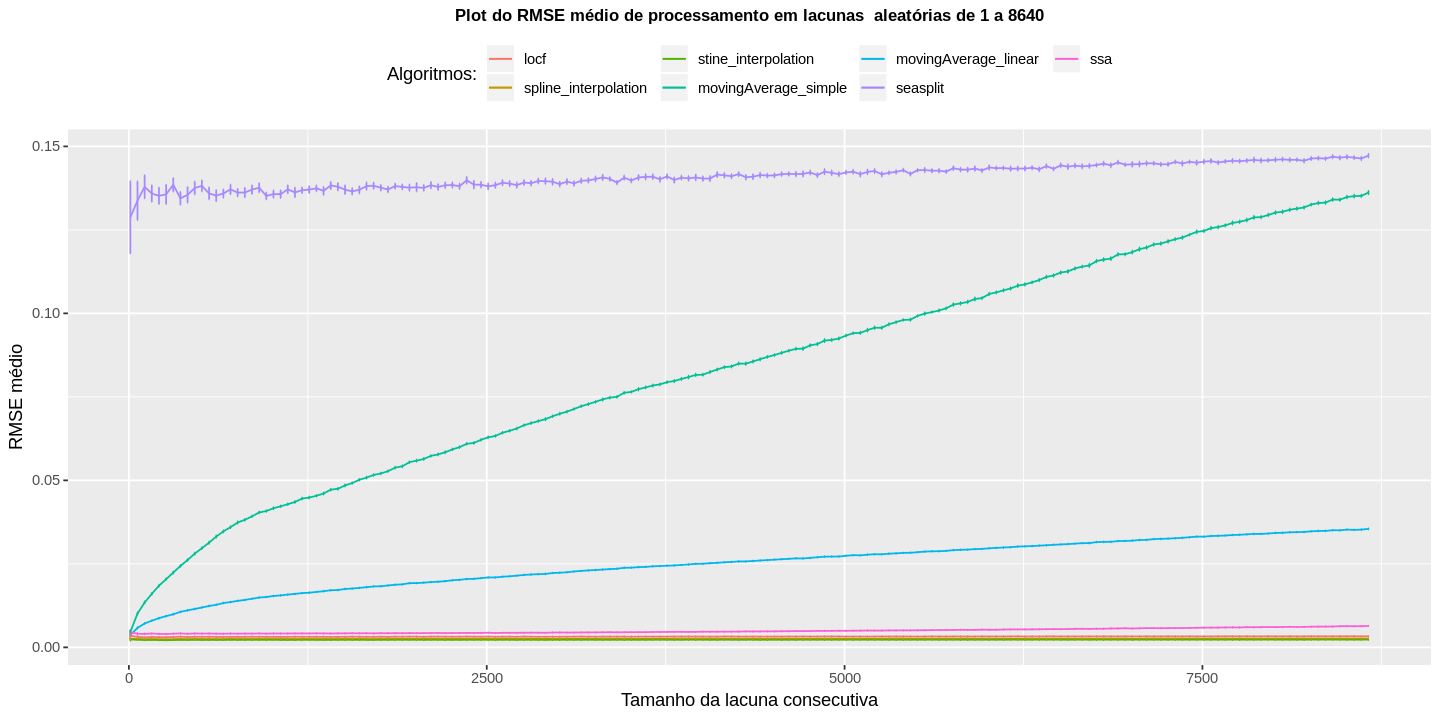

In [58]:
options(repr.plot.width=12, repr.plot.height=6)
rmse=ggplot(todosMedia, aes(x=tamanho, y=rmse, colour=algoritmo))+
  #  geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=rmse-error, ymax=rmse+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))+
    ggtitle("Plot do RMSE médio de processamento em lacunas  aleatórias de 1 a 8640")+  theme(legend.position = "top", plot.title = element_text(hjust = 0.5, size=9, face = "bold"))+
    theme(plot.title = element_text(hjust = 0.5, size=10))+ 
  labs(
    x = "Tamanho da lacuna consecutiva",
    y = "RMSE médio",
    colour = "Algoritmos:"
   )

rmse

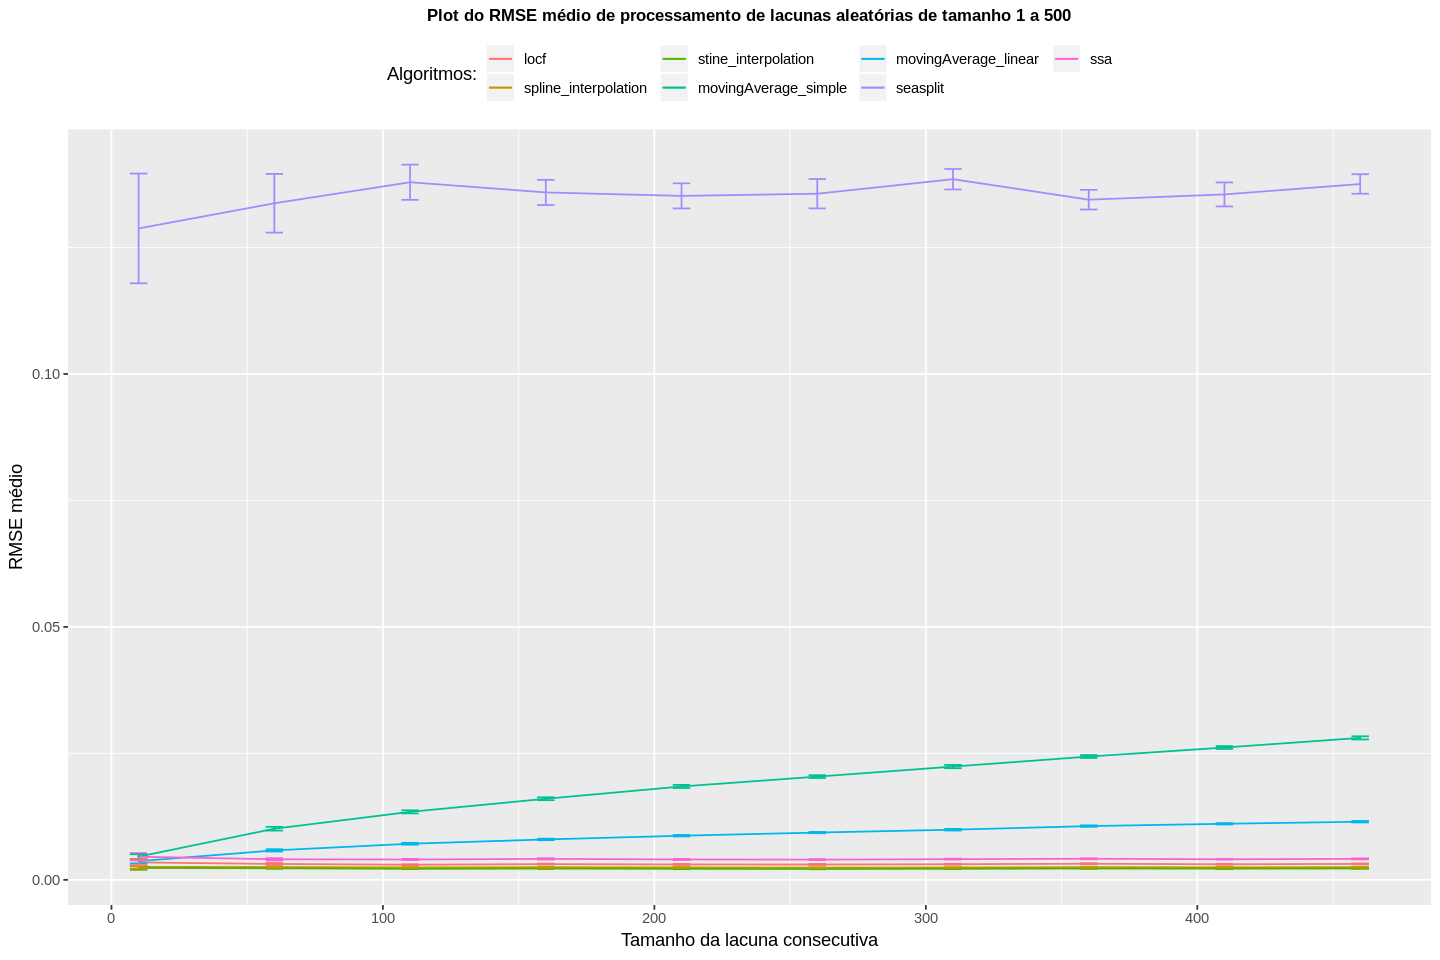

In [59]:
options(repr.plot.width=12, repr.plot.height=8)
ggplot(todosMedia[which(todosMedia$tamanho<500),], aes(x=tamanho, y=rmse, colour=algoritmo))+
  #  geom_point()+
    geom_line()+
    ggtitle("Plot de todos os resultados")+  theme(plot.title = element_text(hjust = 0.5, size=9))+
    geom_errorbar(aes(ymin=rmse-error, ymax=rmse+error), position=pd) +
   ggtitle("Plot do RMSE médio de processamento de lacunas aleatórias de tamanho 1 a 500")+  theme(legend.position = "top", plot.title = element_text(hjust = 0.5, size=9, face = "bold"))+
    theme(plot.title = element_text(hjust = 0.5, size=10))+ 
  labs(
    x = "Tamanho da lacuna consecutiva",
    y = "RMSE médio",
    colour = "Algoritmos:"
   )

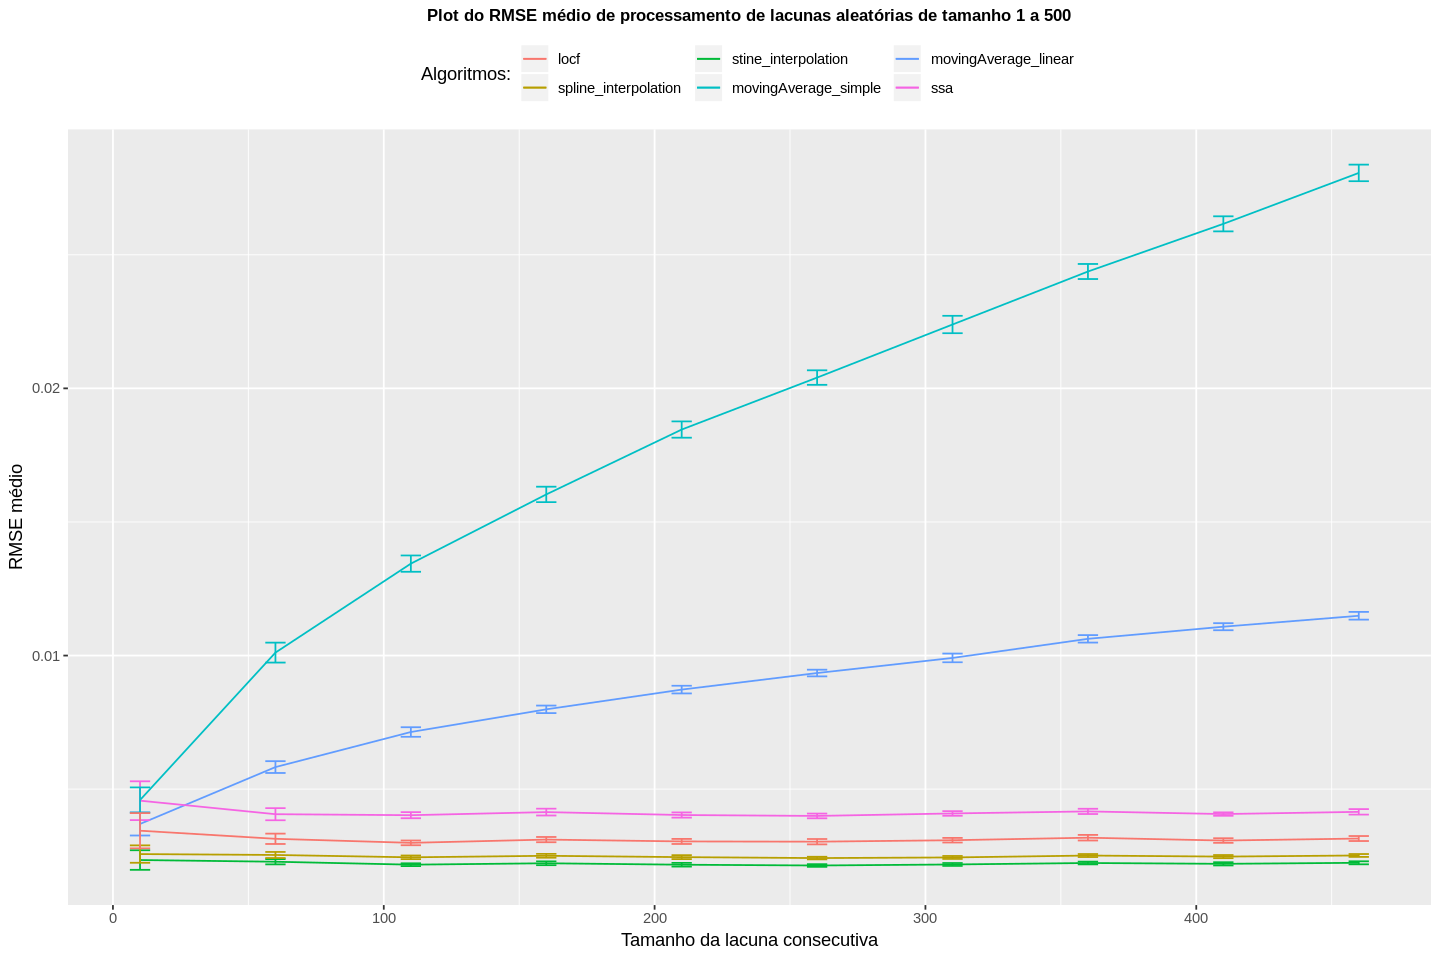

In [60]:
options(repr.plot.width=12, repr.plot.height=8)
ggplot(todosMedia[which((todosMedia$tamanho<500) & (todosMedia$algoritmo!="seasplit")),], aes(x=tamanho, y=rmse, colour=algoritmo))+
  #  geom_point()+
    geom_line()+
    ggtitle("Plot de todos os resultados")+  theme(plot.title = element_text(hjust = 0.5, size=9))+
    geom_errorbar(aes(ymin=rmse-error, ymax=rmse+error), position=pd) +
   ggtitle("Plot do RMSE médio de processamento de lacunas aleatórias de tamanho 1 a 500")+  theme(legend.position = "top", plot.title = element_text(hjust = 0.5, size=9, face = "bold"))+
    theme(plot.title = element_text(hjust = 0.5, size=10))+ 
  labs(
    x = "Tamanho da lacuna consecutiva",
    y = "RMSE médio",
    colour = "Algoritmos:"
   )

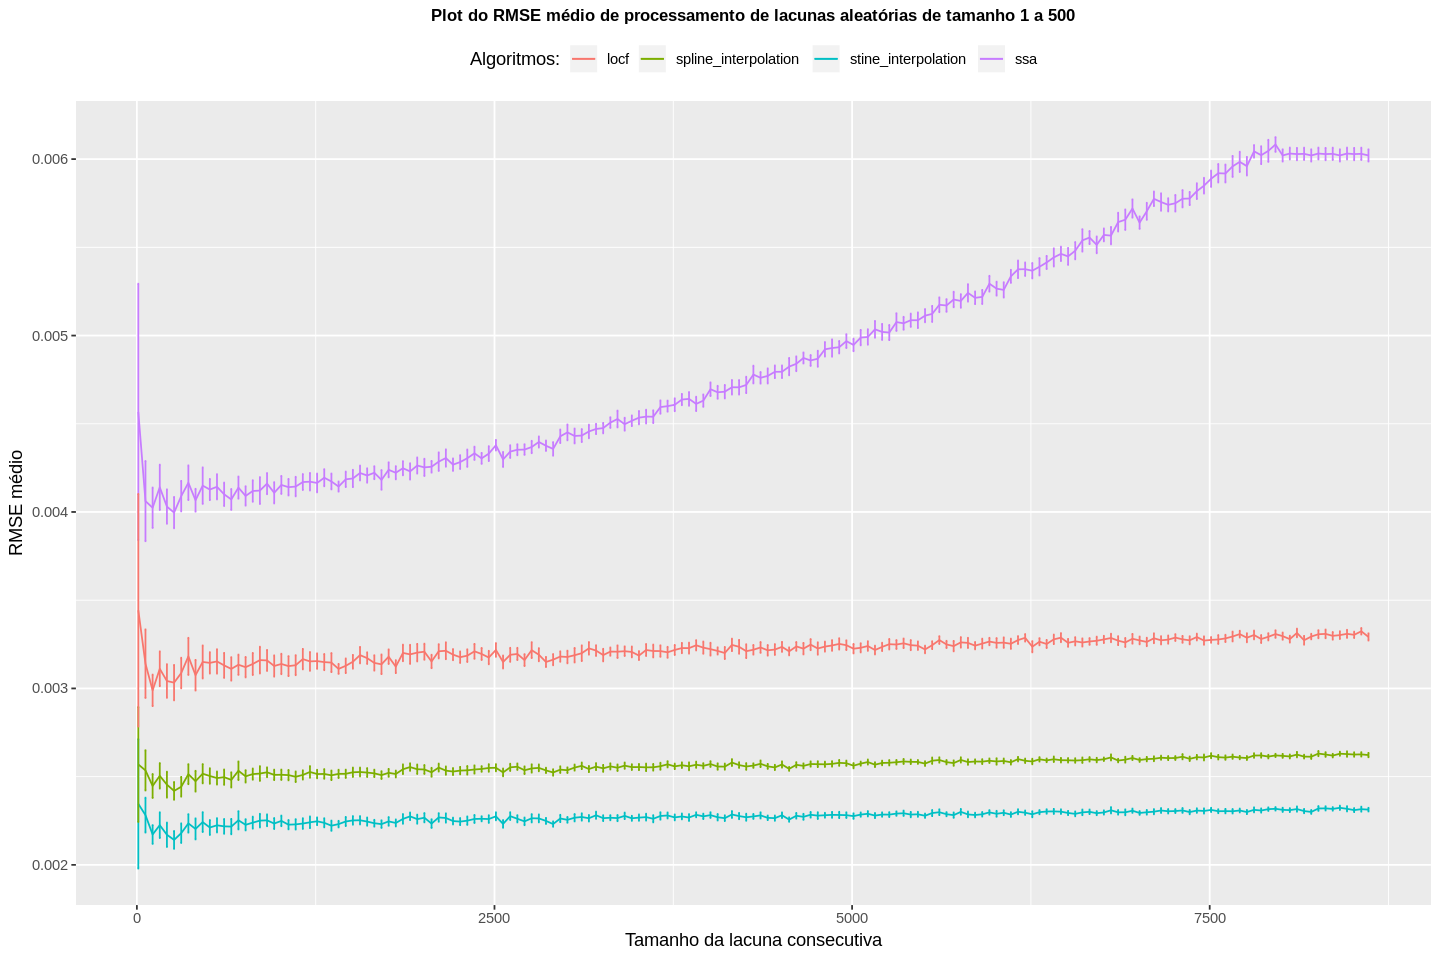

In [49]:
options(repr.plot.width=12, repr.plot.height=8)
ggplot(todosMedia[which((todosMedia$tamanho<8640) & (todosMedia$algoritmo=="spline_interpolation" | todosMedia$algoritmo=="locf" | todosMedia$algoritmo=="stine_interpolation"  | todosMedia$algoritmo=="ssa")),], aes(x=tamanho, y=rmse, colour=algoritmo))+
  #  geom_point()+
    geom_line()+
    ggtitle("Plot de todos os resultados")+  theme(plot.title = element_text(hjust = 0.5, size=9))+
    geom_errorbar(aes(ymin=rmse-error, ymax=rmse+error), position=pd) +
   ggtitle("Plot do RMSE médio de processamento de lacunas aleatórias de tamanho 1 a 500")+  theme(legend.position = "top", plot.title = element_text(hjust = 0.5, size=9, face = "bold"))+
    theme(plot.title = element_text(hjust = 0.5, size=10))+ 
  labs(
    x = "Tamanho da lacuna consecutiva",
    y = "RMSE médio",
    colour = "Algoritmos:"
   )

Tempo 
===

In [53]:
algoritmo100a10800=read.table("../expRandomFinal/time/alg.txt")
tempo100a10800=read.table("../expRandomFinal/time/tempo.txt")
a=as.data.frame(cbind(algoritmo100a10800, tempo100a10800))
a$tamanho=rep(seq(10,8660,50), each=30)


names(a)=c("algoritmo", "tempo", "tamanho")
head(a)
a$tempo=as.numeric(hms(a$tempo))


a$tempo=a$tempo/100
mediaTempo= a %>% group_by(algoritmo, tamanho) %>%
summarize(tempo = mean(tempo, na.rm = TRUE))

sdTempo = a %>% group_by(algoritmo, tamanho) %>%
summarize(sd=sd(tempo, na.rm=TRUE))
mediaTempo$sd=sdTempo$sd


n=30 #tamanho da amostra. Ou seja, tem 30 lacunas de tamanho 100, 30 de tamanho 200...
error=qnorm(0.975)*mediaTempo$sd/sqrt(n)
mediaTempo$error=error
# The errorbars overlapped, so use position_dodge to move them horizontally
pd <- position_dodge(0.2) # move them .05 to the left and right




algoritmo,tempo,tamanho
spline_interpolation,0:00.03,10
spline_interpolation,0:00.03,10
spline_interpolation,0:00.02,10
spline_interpolation,0:00.03,10
spline_interpolation,0:00.04,10
spline_interpolation,0:00.03,10


In [245]:
algoritmo100a10800=read.table("../expRandomFinal/time/alg.txt")
tempo100a10800=read.table("../expRandomFinal/time/tempo.txt")
a=as.data.frame(cbind(algoritmo100a10800, tempo100a10800))
a$tamanho=rep(seq(10,8660,50), each=30)

algoritmo1a100=read.table("../expOriginal1-100/time/alg.txt")
tempo1a100=read.table("../expOriginal1-100/time/tempo.txt")
b=as.data.frame(cbind(algoritmo1a100,tempo1a100))
b$tamanho=rep(seq(1,99,1), each=30)

a=rbind(b,a)
names(a)=c("algoritmo", "tempo", "tamanho")
head(a)
a$tempo=as.numeric(hms(a$tempo))


a$tempo=a$tempo/100
mediaTempo= a %>% group_by(algoritmo, tamanho) %>%
summarize(tempo = mean(tempo, na.rm = TRUE))

sdTempo = a %>% group_by(algoritmo, tamanho) %>%
summarize(sd=sd(tempo, na.rm=TRUE))
mediaTempo$sd=sdTempo$sd


n=30 #tamanho da amostra. Ou seja, tem 30 lacunas de tamanho 100, 30 de tamanho 200...
error=qnorm(0.975)*mediaTempo$sd/sqrt(n)
mediaTempo$error=error
# The errorbars overlapped, so use position_dodge to move them horizontally
pd <- position_dodge(0.2) # move them .05 to the left and right


#ajust
temp=(mediaTempo[which(mediaTempo$algoritmo=="seasplit" & mediaTempo$tamanho<=99), 3] - 0.65)
nrow(temp)
temp2=(mediaTempo[which(mediaTempo$algoritmo=="seasplit" & mediaTempo$tamanho>99), 3])
temp1=rbind(temp, temp2)
mediaTempo[which(mediaTempo$algoritmo=="seasplit"),3] = temp1


mediaTempo= mediaTempo[which(mediaTempo$algoritmo=="locf" |  mediaTempo$algoritmo=="movingAverage_simple" | mediaTempo$algoritmo=="stine_interpolation" | mediaTempo$algoritmo=="seasplit" | mediaTempo$algoritmo=="ssa"),]


algoritmo,tempo,tamanho
linear_interpolation,0:00.03,1
linear_interpolation,0:00.05,1
linear_interpolation,0:00.03,1
linear_interpolation,0:00.04,1
linear_interpolation,0:00.04,1
linear_interpolation,0:00.03,1


[1] 99

In [246]:
dfCompleto=as.data.frame(rbind(mediaTempo[which(mediaTempo$algoritmo=="locf"), 1:3], 
            mediaTempo[which(mediaTempo$algoritmo=="movingAverage_simple"), 1:3], 
            mediaTempo[which(mediaTempo$algoritmo=="stine_interpolation"), 1:3], 
            mediaTempo[which(mediaTempo$algoritmo=="seasplit"), 1:3], 
            mediaTempo[which(mediaTempo$algoritmo=="ssa"), 1:3]
           ))
teste2=as.data.frame(rbind(todosMedia[which(todosMedia$algoritmo=="locf"), 1:3], 
            todosMedia[which(todosMedia$algoritmo=="movingAverage_simple"), 1:3], 
            todosMedia[which(todosMedia$algoritmo=="stine_interpolation"), 1:3], 
            todosMedia[which(todosMedia$algoritmo=="seasplit"), 1:3], 
            todosMedia[which(todosMedia$algoritmo=="ssa"), 1:3]
           ))
dfCompleto$rmse=teste2[,3]


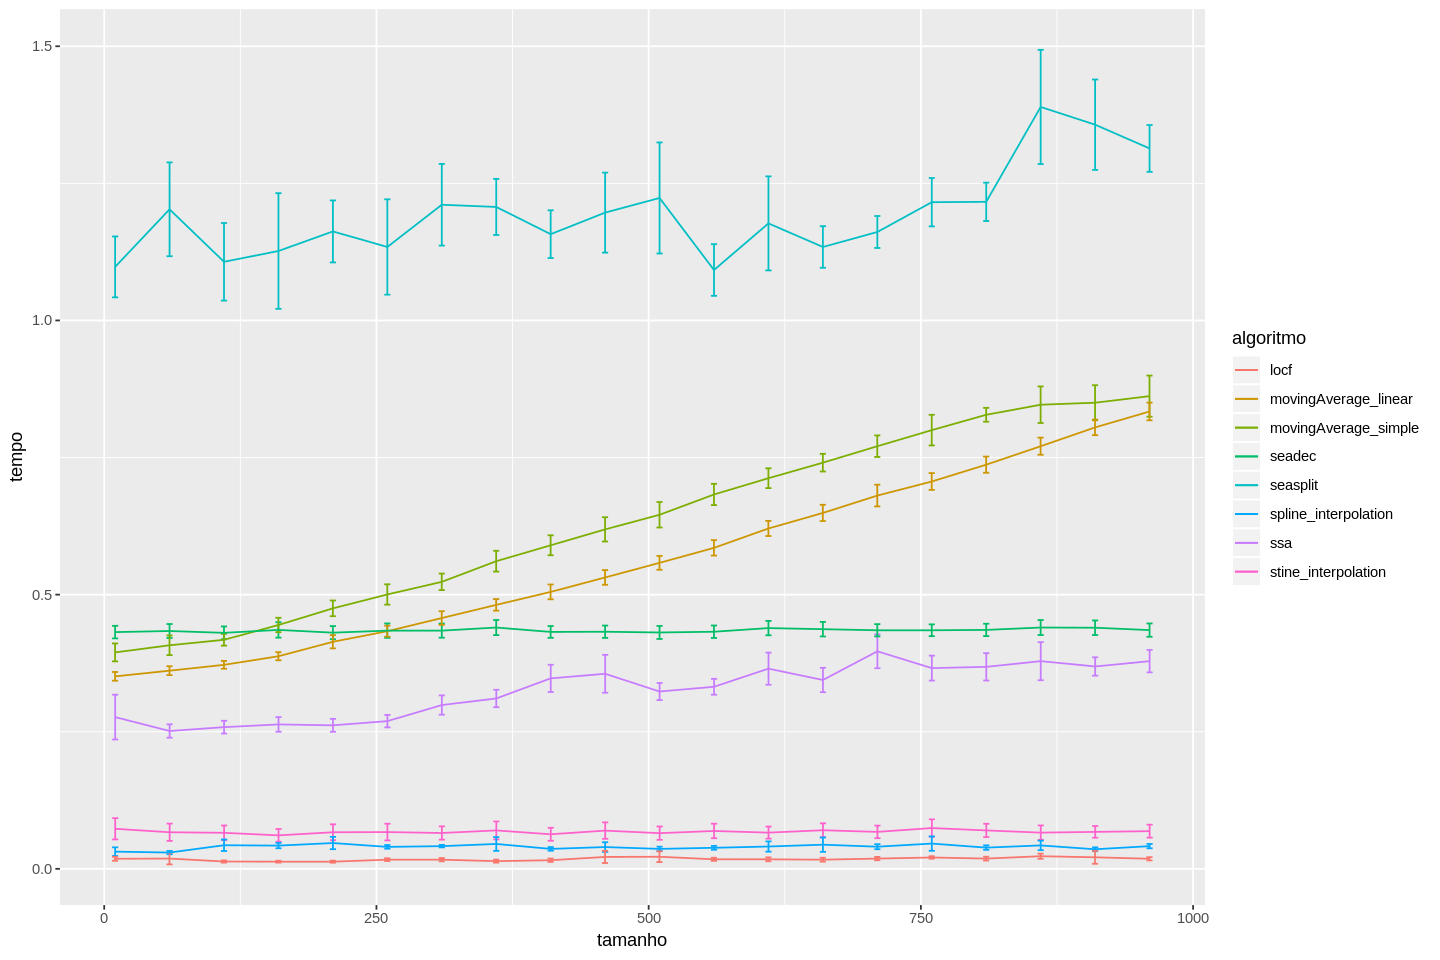

In [54]:
algTempo=ggplot(mediaTempo, aes(x=tamanho, y=tempo, colour=algoritmo))+
	geom_line()+
    geom_errorbar(aes(ymin=tempo-error, ymax=tempo+error), position=pd) 
    #+geom_point()

ggplot(mediaTempo[which(mediaTempo$algoritmo=="" | mediaTempo$tamanho<1000),], aes(x=tamanho, y=tempo, colour=algoritmo))+
geom_errorbar(aes(ymin=tempo-error, ymax=tempo+error), position=pd) +
geom_line()#+ geom_point()
